In [2]:
%matplotlib inline
import shutil
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import glob
from scipy.stats import norm

In [3]:
data_columns = ['ARG', 'ASN','ASP','CYS', 'GLN','GLU','GLY','HIS','ILE','LYS','MET','PHE','PRO','SC','SER', \
                   'THR','TRP','TYR','VAL','ALA','buns','buns_all_heavy','buns_bb_heavy','buns_nonheavy',\
                   'buns_sc_heavy','cart_bonded','chainbreak','ddg_complex','dsasa','geometry','holes',\
                   'interfE','nres','omega','p_aa_pp','prepro','pstat','rama','rwl','ss_sc','total_score', \
                   'total_score_res']
all_scores = list()
pdb_names = list()
pdb_loc = list()
my_runs = glob.glob('*/*/*foldit*_*_*_*pdb')
print('gabis pdbs: '+str(len(my_runs)))
jason_runs = glob.glob('/home/klimaj/jobs/projects/beta-barrel/loop_grafting/grafted_loops/*/*/*foldit*_*_*_*pdb')
print('jasons pdbs: '+str(len(jason_runs)))
all_pdbs = my_runs + jason_runs
for pdb in all_pdbs:
    single_pdb_all_data = list()
    pdb_names.append(pdb.split('/')[-1])
    pdb_loc.append(pdb.split(pdb_names[-1])[0])
    end = False
    with open(pdb, 'r') as f:
        for line in f:
            if '#END_POSE_ENERGIES_TABLE' in line:
                end = True
            if end:
                if 'ARG' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'ASN' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'ASP' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'CYS' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'GLN' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'GLU' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'GLY' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'HIS' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'ILE' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'LYS' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'MET' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'PHE' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'PRO' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'SER' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'THR' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'TRP' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'TYR' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'VAL' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'ala_count' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'SC' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'buns ' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'buns_all_heavy' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'buns_bb_heavy' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'buns_nonheavy' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'buns_sc_heavy' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'cart_bonded' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'chainbreak' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'ddg_complex' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'dsasa' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'geometry' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'holes' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'interfE' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'nres' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'omega' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'p_aa_pp' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'prepro' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'pstat' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'rama' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'rwl' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'ss_sc' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'total_score ' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'total_score_res' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
    f.close()
    all_scores.append(single_pdb_all_data)
all_scores_np = np.asarray(all_scores,dtype=np.float32)
all_scores_df = pd.DataFrame(all_scores_np, columns=data_columns)
pdb_names_np = np.asarray(pdb_names)
pdb_names_df = pd.DataFrame({'pdb':pdb_names_np})
pdb_loc_np = np.asarray(pdb_loc)
pdb_loc_df = pd.DataFrame({'loc':pdb_loc_np})
all_scores_df = all_scores_df.join(pdb_names_df)
all_scores_df = all_scores_df.join(pdb_loc_df)
print('total number of pdbs: %d' %len(pdb_names))

gabis pdbs: 8524
jasons pdbs: 637
total number of pdbs: 9161


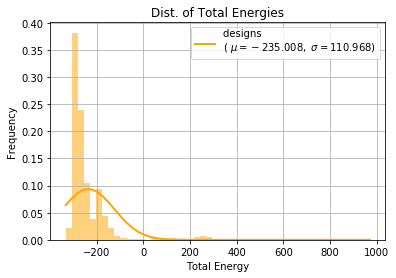

In [4]:
data = all_scores_df['total_score']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5,)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Total Energies')
plt.xlabel('Total Energy')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

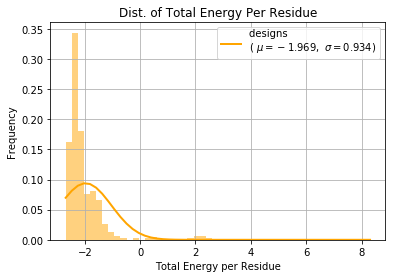

In [5]:
data = all_scores_df['total_score_res']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Total Energy Per Residue')
plt.xlabel('Total Energy per Residue')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

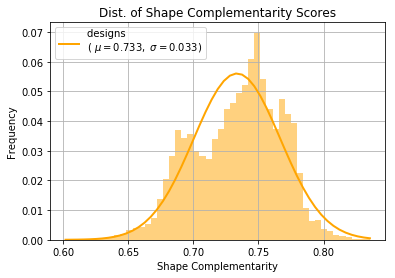

In [6]:
data = all_scores_df['SC']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Shape Complementarity Scores')
plt.xlabel('Shape Complementarity')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

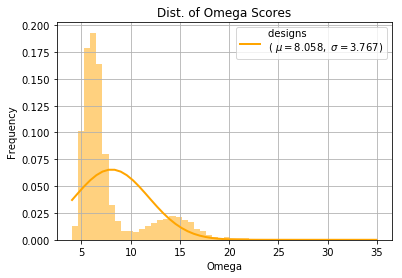

In [7]:
data = all_scores_df['omega']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Omega Scores')
plt.xlabel('Omega')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

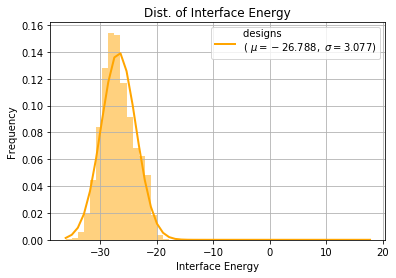

In [8]:
data = all_scores_df['interfE']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Interface Energy')
plt.xlabel('Interface Energy')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

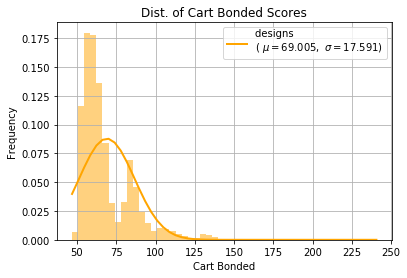

In [9]:
data = all_scores_df['cart_bonded']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Cart Bonded Scores')
plt.xlabel('Cart Bonded')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

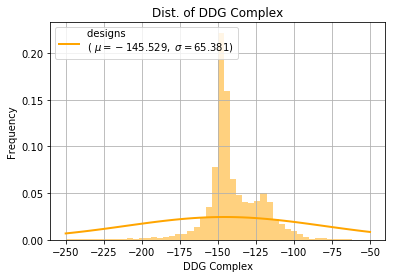

In [10]:
data = all_scores_df['ddg_complex']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5, range=[-250,-50])
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of DDG Complex')
plt.xlabel('DDG Complex')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

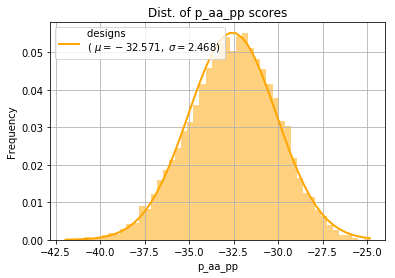

In [11]:
data = all_scores_df['p_aa_pp']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of p_aa_pp scores')
plt.xlabel('p_aa_pp')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

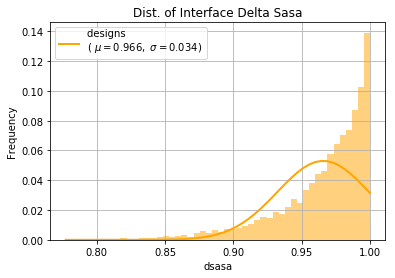

In [12]:
data = all_scores_df['dsasa']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of Interface Delta Sasa')
plt.xlabel('dsasa')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

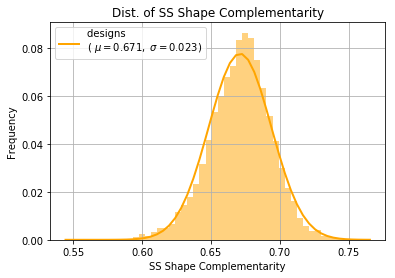

In [13]:
data = all_scores_df['ss_sc']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of SS Shape Complementarity')
plt.xlabel('SS Shape Complementarity')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

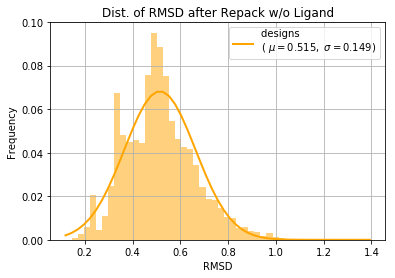

In [14]:
data = all_scores_df['rwl']
# turn counts into frequencies
weights = np.ones_like(data)/float(len(data))
# norm.fit returns an array of params, param[0] and [1] are mean and sd.
(mu, sigma) = norm.fit(data)
n, bins, patches = plt.hist(data, 50, normed=0, weights=weights, facecolor='orange', alpha=0.5)
delta_x = bins[1] - bins[0]
#scale the norm probability density function into probability function
y = mlab.normpdf(bins, mu, sigma)*delta_x
l = plt.plot(bins, y, 'orange', linewidth=2, label='designs \n($\ \mu=%.3f,\ \sigma=%.3f$)'%(mu, sigma))

plt.title('Dist. of RMSD after Repack w/o Ligand')
plt.xlabel('RMSD')
plt.ylabel('Frequency')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

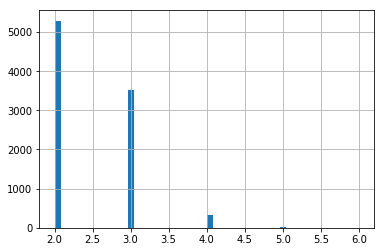

In [15]:
all_scores_df['TRP'].hist(bins=50)

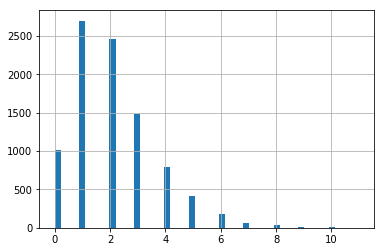

In [16]:
all_scores_df['buns_bb_heavy'].hist(bins=50)

In [17]:
test = all_scores_df.loc[(all_scores_df['total_score_res'] <= -2.5)]
test_array = test.as_matrix()
print(len(test_array))
test = all_scores_df.loc[(all_scores_df['interfE'] <= -30)]
test_array = test.as_matrix()
print(len(test_array))
test = all_scores_df.loc[(all_scores_df['SC'] >= 0.73)]
test_array = test.as_matrix()
print(len(test_array))
test = all_scores_df.loc[(all_scores_df['geometry'] > 0)]
test_array = test.as_matrix()
print(len(test_array))
test = all_scores_df.loc[(all_scores_df['buns_sc_heavy'] < 1)]
test_array = test.as_matrix()
print(len(test_array))
test = all_scores_df.loc[(all_scores_df['buns_bb_heavy'] <= 2)]
test_array = test.as_matrix()
print(len(test_array))
test = all_scores_df.loc[(all_scores_df['pdb'].str.contains('L3'))]
test_array = test.as_matrix()
print(len(test_array))

1068
1134
5325
3248
666
6174
6183


In [113]:
#for picking best ones, previous script
#open a file
#f3 = open('better.list', 'w')
goodones = all_scores_df.loc[(all_scores_df['SC'] >= 0.73) & \
                             ( ( (all_scores_df['pdb'].str.contains('L3')) & (all_scores_df['interfE'] <= -20) ) | \
                                        (all_scores_df['interfE'] <= -30) ) & \
                             (all_scores_df['total_score_res'] <= -2.325) & \
                             (all_scores_df['geometry'] > 0) & \
                             (all_scores_df['buns_sc_heavy'] <= 1) & \
                             (all_scores_df['buns_bb_heavy'] <= 2) & \
                             (all_scores_df['pdb'].str.contains('._4[0-9]_[0-9][0-9].*_17_[0-9][0-9]'))]
goodones_array = goodones.as_matrix()
# print out how many good ones are selected
a=len(goodones_array)
b=len(all_scores_df['total_score_res'])
print(a, b)
#print out the percentage
print(float(a)/float(b))

for item in range(0, len(goodones_array)):
    if 'klimaj' in str(goodones_array[item][-1]):
        file_name = str(goodones_array[item][-1])+str(goodones_array[item][-2])+'\n'
    else:
        file_name = 'grafted_loops/'+str(goodones_array[item][-1])+str(goodones_array[item][-2])+'\n'
    print(file_name)
    #f3.write(file_name)
#f3.close()

12 9161
0.0013099006658661718
grafted_loops/L5C_0059_45_51/L5C_0059_45_51_L5C_0073_17_21/nC5_WW_refine_14_foldit_1_L5C_0059_47_53_L5C_0073_17_23.pdb

grafted_loops/old_run_02_21/all_pdbs/nC5_WW_refine_14_foldit_1_L3A_0013_47_58_L5C_0005_17_23.pdb

grafted_loops/old_run_02_21/all_pdbs/nC5_WW_refine_14_foldit_1_L3D_0047_47_57_L5C_0058_17_23.pdb

grafted_loops/L3D_0037_45_51/L3D_0037_45_51_L5C_0053_17_21/nC5_WW_refine_14_foldit_1_L3D_0037_47_57_L5C_0053_17_23.pdb

grafted_loops/L3D_0037_45_51/L3D_0037_45_51_L5C_0005_17_21/nC5_WW_refine_14_foldit_1_L3D_0037_47_57_L5C_0005_17_23.pdb

grafted_loops/L3A_0013_45_51/L3A_0013_45_51_L5C_0091_17_21/nC5_WW_refine_14_foldit_1_L3A_0013_47_58_L5C_0091_17_23.pdb

grafted_loops/L3A_0013_45_51/L3A_0013_45_51_L5F_0084_17_21/nC5_WW_refine_14_foldit_1_L3A_0013_47_58_L5F_0084_17_23.pdb

grafted_loops/L3D_0006_45_51/L3D_0006_45_51_L5D_0051_17_21/nC5_WW_refine_14_foldit_1_L3D_0006_48_58_L5D_0051_17_24.pdb

grafted_loops/L3A_0071_45_51/L3A_0071_45_51_L5C_0033_1

long_insert = all_scores_df.loc[(all_scores_df['nres'] > 118)]
goodones['nres'].hist(bins=50)